In [143]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

In [144]:
CONFIDENCE_THRESHOLD = 0.4
NMS_THRESHOLD = 0.5

In [145]:
class_names = []
with open("coco.names", "r") as f:
    class_names = [cname.strip() for cname in f.readlines()]

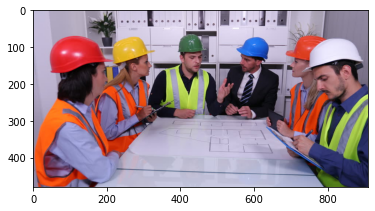

In [160]:
img = cv2.imread("np1.png")
im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)

In [161]:
colors = np.random.uniform(0,255,size=(len(class_names),3))

In [162]:
net = cv2.dnn.readNet("custom-yolov4-tiny-detector_best.weights", "custom-yolov4-tiny-detector.cfg")
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA_FP16)

In [163]:
model = cv2.dnn_DetectionModel(net)
model.setInputParams(size=(640, 640), scale=1/255, swapRB=True)

In [164]:
classes, scores, boxes = model.detect(img, CONFIDENCE_THRESHOLD, NMS_THRESHOLD)

In [165]:
boxes

array([[214,  70, 113, 111],
       [550,  58,  97, 118],
       [384,  58,  87, 109],
       [719,  78, 185, 161],
       [ 37,  37, 183, 222],
       [688,  62, 116, 136]], dtype=int32)

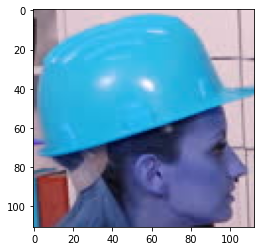

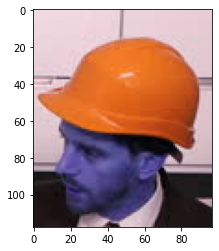

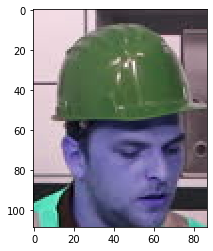

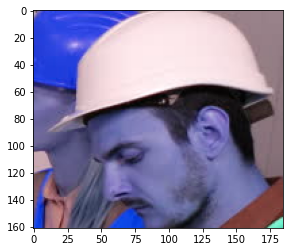

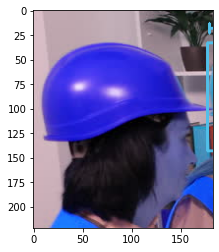

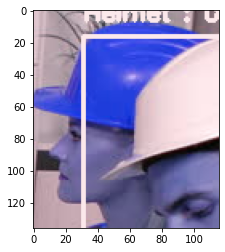

In [166]:
for (classid, score, box) in zip(classes, scores, boxes):
    #color=colors[classid[0]]
    img2=img[box[1]:box[1]+box[3],box[0]:box[0]+box[2]]
    #crop = image[y:y+h, x:x+w]
    x=int((box[2])/2)
    y=int((box[3])/3.5)
    plt.imshow(img2)
    plt.show()
    ifa = Image.fromarray(img2)
    color = ifa.getpixel((x,y))
    label = "%s : %f" % (class_names[classid[0]], score)
    cv2.rectangle(img, box,color, 2)
    cv2.putText(img, label, (box[0], box[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5,color, 2)
    

In [167]:
print(type(box))
box[1]

<class 'numpy.ndarray'>


62

In [168]:
cv2.imwrite('frame.jpg',img)

True

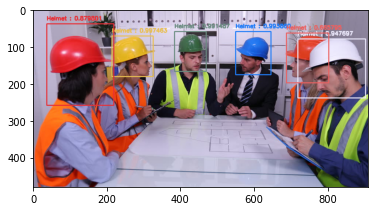

In [169]:

im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)
plt.show()